## Lab 9: Esimation and resampling

# Your Name: Caroline Petersen

*Estimation* is a core concept in data science. One can investigate the random variation in a set of estimates by simulating sampling from the population many times and computing estimates from each sample.  In real life, we often don not know what the population looks like, so that exercise was useful for  *understanding random variation* in an estimate, but not as a tool for practical data analysis.

Now we'll flip that idea on its head to make it practical.  Given *just* a random sample of serial numbers, we'll estimate `N`, and then we'll use simulation to find out how accurate our estimate probably is, without ever looking at the whole population.  This is an example of *statistical inference*.

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Preliminaries
The setup: The British Royal Air Force (RAF) in World War II want to know the number of warplanes fielded by the Germans.  That number is `N`.  The warplanes have serial numbers from 1 to `N`, so `N` is also equal to the largest serial number on any of the warplanes. We only see a small random sample of serial numbers, so we have to use estimation.

#### Question 1.1
Is `N` a population parameter or a statistic?  If we compute a number using our random sample that's an estimate of `N`, is that a population parameter or a statistic?

**N is a parameter in this scenario as it represents the entire population of warplanes. The estimate of the number of warplanes is a statistic. We calculated this value solely from a sample to estimate the population parameter, and because it came from a sample of the population, it is classified as a statistic.**

To make the situation realistic, the true number of warplanes are hidden from you.  You'll have access only to this random sample:

In [23]:
observations = pd.read_csv("serial_numbers.csv")
num_observations = len(observations.index)
observations

serial number
0              47
1              42
2              57
3              79
4              26
5              23
6              36
7              64
8              83
9             135
10             41
11             21
12             67
13            108
14             84
15             50
16             78

Now make a histogram of `observations`

array([[<Axes: title={'center': 'serial number'}>]], dtype=object)

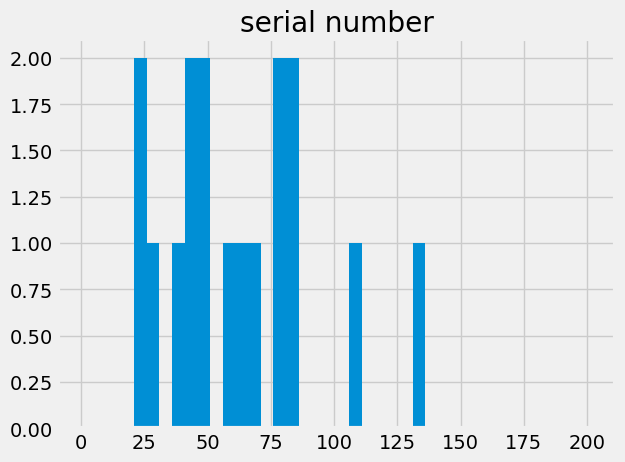

In [24]:
observations.hist(bins=np.arange(1, 200+2, 5))

#### Question 1.2
Define a function named `plot_serial_numbers` to make a histogram of serial numbers.  It should take one argument, a `pandas` dataframe like `observations` with one column called `"serial number"`.  It should plot a histogram of the values in the column **using bins of width 1** ranging from **1 to 200** but return nothing.  Then, call that function to make a histogram of `observations`.

array([[<Axes: title={'center': 'serial number'}>]], dtype=object)

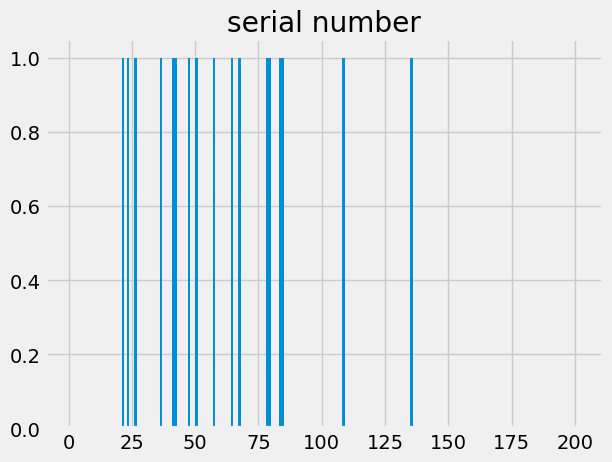

In [25]:
def plot_serial_numbers(numbers):
    return numbers.hist(bins=np.arange(1, 200+2, 1))

plot_serial_numbers(observations)

#### Question 1.3
What does each little bar in the histogram represent and why are all the bars the same height?

**Each bar represents the frequency of ranges of serial numbers for the warplanes. The sizes are all the same because this is a uniform distribution where each serial number has an equal chance of being observed.**

#### Question 1.4
One way to estimate `N` is to take twice the mean of the serial numbers we see. Write a function that computes that statistic.  It should take as its argument an array of serial numbers and return twice their mean.  Call it `mean_based_estimator`.  



In [26]:
def mean_based_estimator(nums):
    return 2 * np.mean(nums)

#### Question 1.5
Now, use `mean_based_estimator` to compute an estimate of `N` called `mean_based_estimate`.

In [27]:
mean_based_estimate = mean_based_estimator(observations)

#Note how we round the result 
np.round(mean_based_estimate,1)

/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


serial number    122.5
dtype: float64

#### Question 1.6
We also estimated `N` using the biggest serial number in the sample.  Compute it, giving it the name `max_estimate`.

In [28]:
max_estimate = max(observations["serial number"])
max_estimate

135

#### Question 1.7
Look at the values of `max_estimate` and `mean_based_estimate` that we happened to get for our dataset.  The value of `max_estimate` tells you something about `mean_based_estimate`.  Can it be equal to `N` (at least if we round it to the nearest integer)?  If not, is it definitely higher, definitely lower, or can we not tell?  Can you make a statement like "`mean_based_estimate` is at least *[fill in a number]* away from `N`"?

**The max estimate is a number that is either less than or equal to the true population size N. There is a 1/N chance that max estimate is exactly equal to N. The largest value the mean estimate can be is when your sample contains all the numbers leading up to the maximum value in your data like max-16 to 16. The largest mean estimate can be 2 times the average of all the numbers from your maximum value to 16 such as 2 * (max - 8) or 2 * (max - 16).**

We can't just confidently proclaim that `max_estimate` or `mean_based_estimate` is equal to `N`.  What if we're really far off?  Let's get a sense of the accuracy of our estimates.

## 2. Resampling
Now we'll use *resampling*: we sample from our sample.

When we tried to estimate `N`, we would have liked to use the whole population.  Since we had only a sample, we used that to estimate `N` instead.

This time, we would like to use the population of serial numbers to *run a simulation* about estimates of `N`.  But we still only have our sample.  We use our sample in place of the population to run the simulation.

So there is a simple analogy between estimating `N` and simulating the variability of estimates.

$$\text{computing }N\text{ from the population}$$
$$:$$
$$\text{computing an estimate of }N\text{ from a sample}$$

$$\text{as}$$

$$\text{simulating the distribution of estimates of }N\text{ using samples from the population}$$
$$:$$
$$\text{simulating an (approximate) distribution of estimates of }N\text{ using resamples from a sample}$$

#### Question 2.1
Write a function called `simulate_resample`.  It returns a resample, of size `num_observations`, from the observed serial numbers in `observations`.  (The resample should be a `pandas` dataframe like `observations`.)  The function `simulate_resample` should take no arguments.

In [29]:
def simulate_resample():
    return observations.sample(num_observations, replace=True)

Let's make one resample.

In [30]:
one_resample = simulate_resample()
one_resample

serial number
7              64
16             78
3              79
0              47
13            108
10             41
9             135
7              64
14             84
16             78
2              57
16             78
0              47
2              57
3              79
6              36
14             84

Later, we'll use many resamples at once to see what estimates typically look like.  We don't often pay attention to single resamples, so it's easy to misunderstand them.  Let's examine some individual resamples before we start using them.

#### Question 2.2
Make a histogram of your resample using the plotting function you defined earlier in this lab, **and** a separate histogram of the original observations.

Text(0.5, 1.0, 'observations')

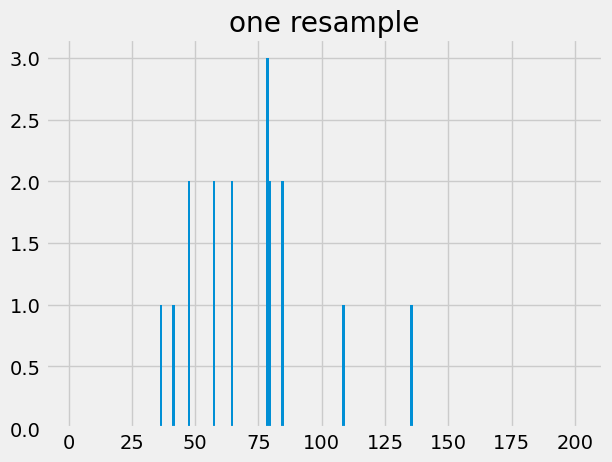

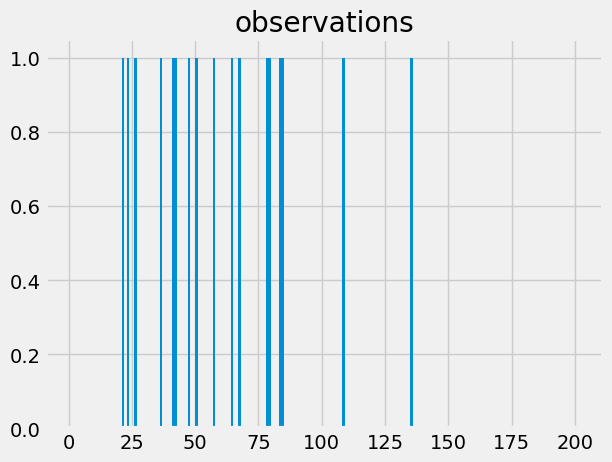

In [31]:
plot_serial_numbers(one_resample) 
plt.title("one resample")
plot_serial_numbers(observations) 
plt.title("observations")

#### Question 2.3
Which of the following are true:
1. In the plot of the resample, there are no bars at locations that weren't there in the plot of the original observations.
2. In the plot of the original observations, there are no bars at locations that weren't there in the plot of the resample.
3. The resample has exactly one copy of each serial number.
4. The sample has exactly one copy of each serial number.

**2 and 4 are true.**

#### Question 2.4
Create 2 more resamples. For each one, plot it as well as compute the max- and mean-based estimates using that resample.

Mean-based estimate for resample 0: serial number    101.9
dtype: float64
Max-based estimate for resample 0: serial number    108
dtype: int64
Mean-based estimate for resample 1: serial number    152.9
dtype: float64
Max-based estimate for resample 1: serial number    135
dtype: int64


/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtyp

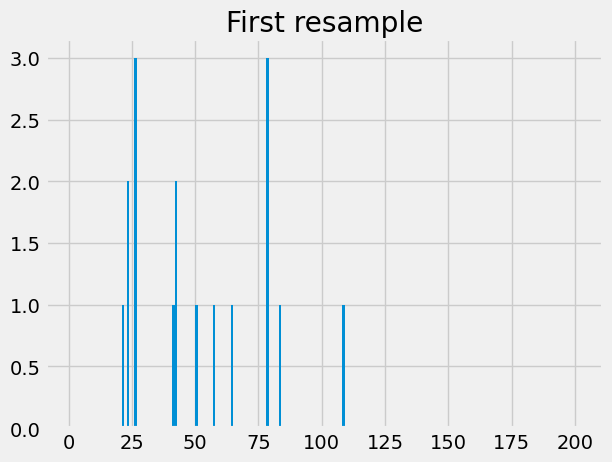

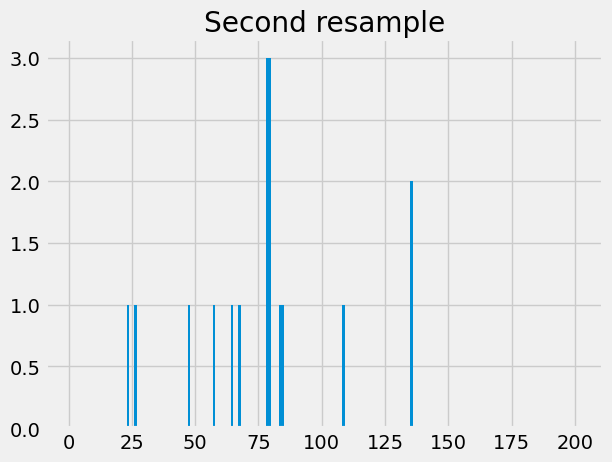

In [32]:
resample_0 = simulate_resample() 
plot_serial_numbers(resample_0) 
plt.title("First resample")
mean_based_estimate_0 = mean_based_estimator(resample_0)
max_based_estimate_0 = np.max(resample_0)
print("Mean-based estimate for resample 0:", np.round(mean_based_estimate_0, 1))
print("Max-based estimate for resample 0:", max_based_estimate_0)

resample_1 = simulate_resample() 
plot_serial_numbers(resample_1) 
plt.title("Second resample")
mean_based_estimate_1 = mean_based_estimator(resample_1)
max_based_estimate_1 = np.max(resample_1)
print("Mean-based estimate for resample 1:", np.round(mean_based_estimate_1,1))
print("Max-based estimate for resample 1:", max_based_estimate_1)

You may find that the max-based estimates from the resamples are both exactly 135.  You will probably find that the two mean-based estimates do differ from the sample mean-based estimate (and from each other).

#### Question 2.5
Using probability that you've learned, compute the exact chance that a max-based estimate from *one* resample is 135.  
Using your intuition, explain why a mean-based estimate from a resample is less often exactly equal to the mean-based estimate from the original sample as compared to a max-based estimate.

**The exact chance that a max-based estimate from one resample is 135 is 1-(1-1/17)^17 or 0.6432.The maximum value will stay at 135 throughout max-based estimates because it's always the maximum value. However, mean-based estimates will change based on the distribution of each resample so it is less likely to be exactly the same as the original average.**

In [33]:
1-(1-1/17)**17

0.6432138052537073

## 3. Simulating with resampling
Since resampling from a sample looks just like sampling from a population, the code should look almost the same.  That means we can write a function that simulates either sampling from a population or resampling from a sample.  If we pass it a population as its argument, it will do the former; if we pass it a sample, it will do the latter.

#### Question 3.1
Write a function called `simulate_estimates`.  It should take 4 arguments:
1. A dataframe with column named `"serial number"` from which to sample the data.
2. The size of each sample from that table, an integer.
3. A *function* that takes an array of serial numbers as its argument and returns a number.
4. The number of replications to perform.

It should simulate many samples with replacement from the given table.  (The number of samples is the 4th argument.)  For each of those samples, it should compute the statistic on that sample. Then it should return an array containing each of those statistics.  The code below provides an example use of your function and describes how you can verify that you've written it correctly.

In [34]:
def simulate_estimates(original_data, sample_size, statistic, num_replications):
    # It is possible to write this function in 5 lines of code.
    stats = []
    for i in np.arange(num_replications):
        s = statistic(original_data.sample(sample_size, replace=True))
        stats.append(s)
    return np.array(stats)

Now run `simulate_estimates` on a set of 1000 serial numbers. This should generate an empirical histogram of twice-mean estimates of N from samples of size 50 if N is 1000.  This should be a bell-shaped
 curve centered at 1000 with most of its mass between 800 and 1200.  

/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
        2.100e+01, 3.300e+01, 8.600e+01, 1.400e+02, 2.790e+02, 4.840e+02,
        6.490e+02, 9.010e+02, 1.149e+03, 1.185e+03, 1.244e+03, 1.035e+03,
        9.300e+02, 7.210e+02, 4.790e+02, 2.780e+02, 2.070e+02, 1.010e+02,
        4.500e+01, 1.900e+01, 6.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([   0.,   25.,   50.,   75.,  100.,  125.,  150.,  175.,  200.,
         225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,  425.,
         450.,  475.,  500.,  525.,  550.,  575.,  600.,  625.,  650.,
         675.,  700.,  725.,  750.,  775.,  800.,  825.,

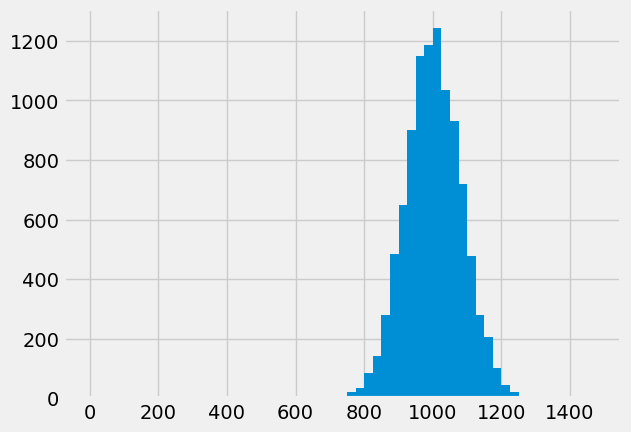

In [35]:
df = pd.DataFrame(np.array(np.arange(1, 1000+1)), columns=['serial number'])
example_estimates = simulate_estimates(df, 50, mean_based_estimator, 10000)

plt.hist(example_estimates, bins=np.arange(0, 1500, 25))

Now we can go back to the sample we actually observed (the table `observations`) and estimate how much our mean-based estimate of `N` would have varied from sample to sample.

#### Question 3.2
Using the bootstrap and the sample `observations`, simulate the approximate distribution of *mean-based estimates* of `N`.  Use 5,000 replications.  
We have provided code that plots a histogram, allowing you to visualize the simulated estimates.

/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, 

/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, 

/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, 

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    7.,   88.,  249.,  647.,  992., 1141.,  926.,  567.,
         274.,   86.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145.]),
 <BarContainer object of 29 artists>)

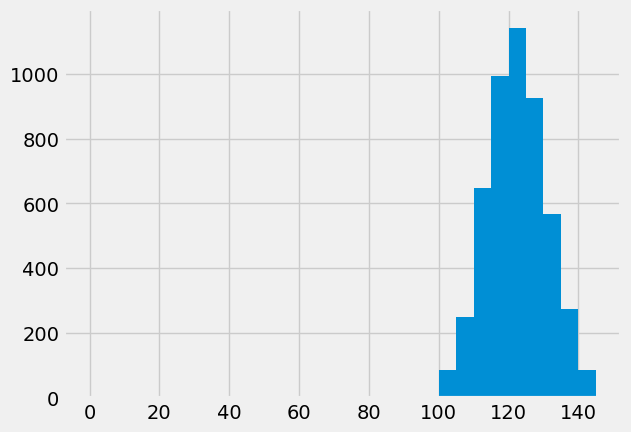

In [36]:
bootstrap_estimates = simulate_estimates(observations, 50, mean_based_estimator, 5000) 

plt.hist(bootstrap_estimates, bins=np.arange(0, 150, 5)) 



#### Question 3.3
Your mean-based estimate of `N` should have been around 122.  Given the above calculations, is it likely that `N` is exactly 122?  Quantify the amount of error in the estimate by making a statement like this:

> "Assuming the population looks similar to the sample, the *difference* between `N` and mean-based estimates of `N` from samples of size 17 is typically in the range [A NUMBER, ANOTHER NUMBER]."

In [37]:
left = np.percentile(bootstrap_estimates, 2.5, method="inverted_cdf")
right = np.percentile(bootstrap_estimates, 97.5, method="inverted_cdf")

np.array([left, right])

array([105.92, 139.48])

**No, it is not likely that N will be exactly 122. Assuminf the population looks similar to the sample, the difference between N and mean-based estimates of N from samples of size 17 is typically in the range (106.52, 139.16)**

#### Question 3.4
`N` was actually 150!  Write code that simulates the sampling and bootstrapping process again, as follows:

1. Generate a new set of random observations the RAF might have seen by sampling from the population table we have created for you below. 
2. Compute an estimate of `N` from these new observations, using `mean_based_estimator`.
3. Using only the new observations, compute 5,000 bootstrap estimates of `N`.

/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, 

/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, 

/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/carolinelpetersen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, 

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   6.,  17.,  39.,  76., 153., 277., 396., 533., 616.,
        678., 630., 569., 401., 277., 173.,  98.,  40.,  10.,   7.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200., 204., 208., 212., 216.,
        220., 224., 228., 232., 236., 240., 244., 248.]),
 <BarContainer object of 62 artists>)

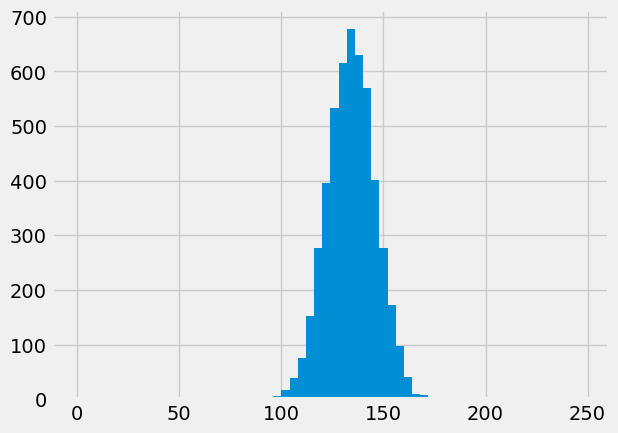

In [38]:
population = pd.DataFrame(np.array(np.arange(1, 150+1)), columns=['serial number'])

new_observations = population.sample(17, replace=True)
new_mean_based_estimate = 2 * np.mean(new_observations)
new_bootstrap_estimates = simulate_estimates(new_observations, 50, mean_based_estimator, 5000) 
plt.hist(new_bootstrap_estimates, bins=np.arange(0, 252, 4))

## 4. Submission
You're finished with lab 9. **To submit this lab**, please download your notebook as a .ipynb file and submit in Canvas under Lab 9 (under Assignments). To export, go to the toolbar at the top of this page, click File > Download as... > Notebook (.ipynb). Then, go to our class's Canvas page and upload your file under "Lab 9".

For easy identification, **please add your surname to the file**, as in: lab_09_DS201_Name.ipynb